In [1]:
import os
import requests
import datetime

from utils.contract_utils import init_contract
from utils.network_utils import configure_network_and_connect

import brownie

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
sns.set_style("whitegrid")

ALCHEMY_API_KEY = os.environ['ALCHEMY_API_KEY']
configure_network_and_connect(
    node_provider_https=f"https://eth-mainnet.alchemyapi.io/v2/{ALCHEMY_API_KEY}",
    network_name='mainnet'
)

In [2]:
pool_address = "0xbcb91E689114B9Cc865AD7871845C95241Df4105"
genesis_block = 13314289
pool_address.lower()

'0xbcb91e689114b9cc865ad7871845c95241df4105'

In [32]:
api = "https://api.thegraph.com/subgraphs/name/convex-community/curve-factory-volume"
query = """
{
  hourlySwapVolumeSnapshots(
    first: 1000,
    orderBy: timestamp,
    orderDirection: desc,
    where: {
      pool: "0xbcb91e689114b9cc865ad7871845c95241df4105"
    }
  )
  {
    timestamp
    volumeUSD
  }
}
"""
r = requests.post(api, json={'query': query})
data = dict(r.json())
timestamps = [int(i['timestamp']) for i in data['data']['hourlySwapVolumeSnapshots']]
timestamps = [datetime.datetime.fromtimestamp(i) for i in timestamps]

In [33]:
data = pd.DataFrame(data['data']['hourlySwapVolumeSnapshots'])
data['volumeUSD'] = data.volumeUSD.astype(float)
timestamps = [datetime.datetime.fromtimestamp(int(i)) for i in data.timestamp]
data['timestamp'] = timestamps
data.set_index('timestamp', inplace=True)
data.sort_index(ascending=True, inplace=True)
data

,volumeUSD
timestamp,
2021-10-06 08:00:00,9.773068e+02
2021-10-13 11:00:00,4.029637e+02
2021-10-14 04:00:00,1.730617e+04
2021-10-14 17:00:00,5.001206e+01
2021-10-19 06:00:00,2.916318e+05
2021-10-20 00:00:00,1.425760e+02
2021-10-27 08:00:00,1.056978e+01
2021-10-27 14:00:00,1.002779e+06
2021-10-28 11:00:00,8.820676e+03


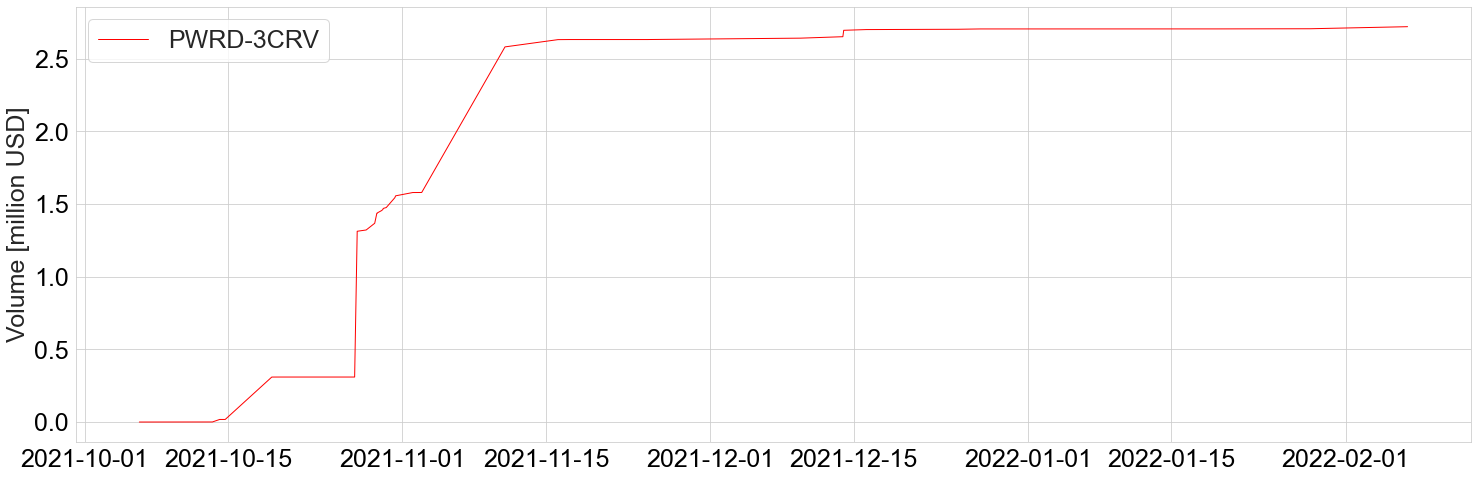

In [35]:
fig, ax = plt.subplots(1,1, figsize=(25, 8))

ax.plot(
    data.index,
    data.volumeUSD.cumsum() * 1e-6,
    color='red',
    label='PWRD-3CRV',
    lw=1
)

ax.set_ylabel("Volume [million USD]", fontsize=25)
ax.set_xlabel("", fontsize=25)
ax.tick_params(axis='both', which='major', labelsize=25, colors='black')
ax.yaxis.get_major_formatter().set_scientific(False)
ax.yaxis.get_major_formatter().set_useOffset(False)
ax.legend(fontsize=25);

In [37]:
0.0003 * 2.5 * 1e6

749.9999999999999